!pip install -- arch

In [1]:
import pandas as pd
from arch import arch_model

### Load CPU Data

In [2]:
#source: https://www.policyuncertainty.com/climate_uncertainty.html
cpu = pd.read_csv('cpu.csv', sep=',')

In [3]:
cpu

,"date,cpu_index,old_cpu_index"
0,"Apr-87,43.58906871,"
1,"May-87,41.86202181,"
2,"Jun-87,71.1352029,"
3,"Jul-87,53.75670371,"
4,"Aug-87,60.61554514,"
...,...
436,"Aug-23,153.4179509,"
437,"Sep-23,213.5992835,"
438,"Oct-23,150.6063625,"
439,"Nov-23,249.2877564,"


In [4]:
cpu[['date', 'cpu_index', 'old_cpu_index']] = cpu['date,cpu_index,old_cpu_index'].str.split(',', expand=True)
cpu['date']= pd.to_datetime(cpu['date'],format='%b-%y')
cpu.set_index('date', inplace=True)
cpu.drop(columns=['date,cpu_index,old_cpu_index','old_cpu_index'], inplace=True)
cpu['cpu_index'] = pd.to_numeric(cpu['cpu_index'])

In [5]:
cpu

,cpu_index
date,
1987-04-01,43.589069
1987-05-01,41.862022
1987-06-01,71.135203
1987-07-01,53.756704
1987-08-01,60.615545
...,...
2023-08-01,153.417951
2023-09-01,213.599284
2023-10-01,150.606362


<Axes: xlabel='date'>

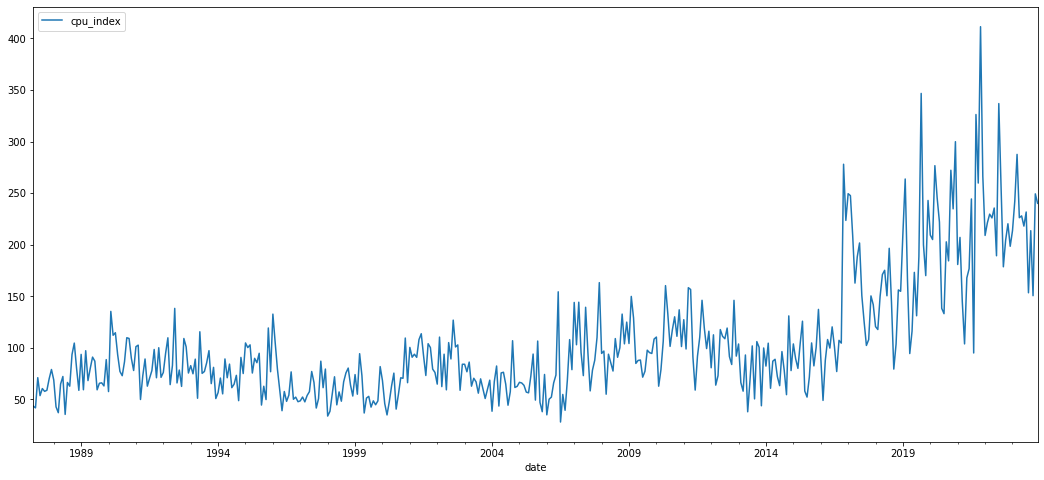

In [6]:
cpu.plot(figsize=(18,8))

### Simulated Disaster Monthly Frequencies

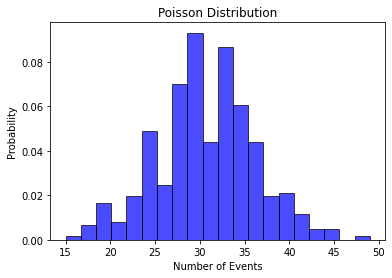

In [7]:
import numpy as np
import matplotlib.pyplot as plt

lambda_parameter = 30

events = np.random.poisson(lambda_parameter, size=30*12)

plt.hist(events, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.show()

In [8]:
date_range = pd.date_range(start='1994-01-01', periods=30*12, freq='M')
sim_disaster_data = pd.DataFrame({'Date': date_range, 'Monthly_Disaster_Freq': events})
sim_disaster_data.set_index('Date', inplace=True)
sim_disaster_data

,Monthly_Disaster_Freq
Date,
1994-01-31,32
1994-02-28,29
1994-03-31,38
1994-04-30,25
1994-05-31,35
...,...
2023-08-31,26
2023-09-30,37
2023-10-31,30


<Axes: xlabel='Date'>

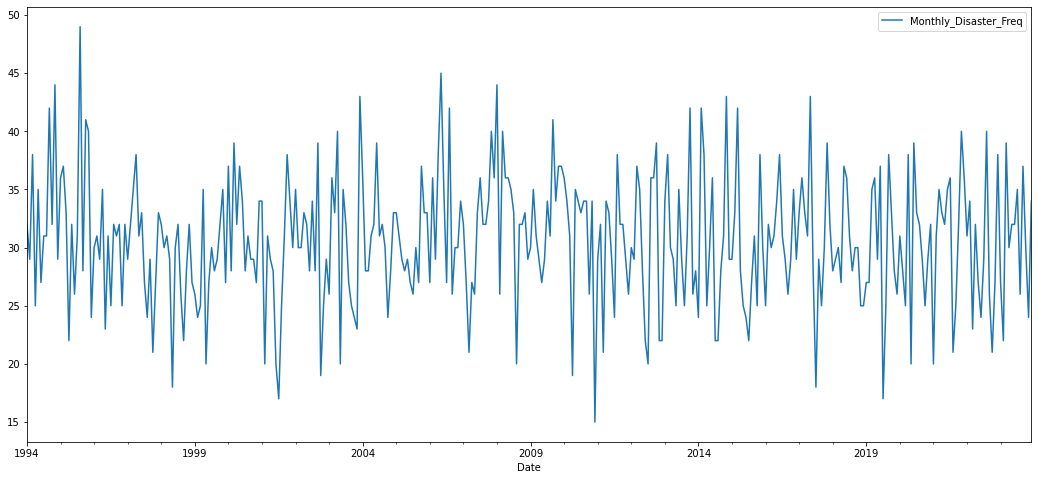

In [9]:
sim_disaster_data.plot(figsize=(18,8))

### Load Natural Gas Future Prices

In [10]:
#Natural Gas Futures price
#Source: https://www.eia.gov/dnav/ng/hist/rngc1d.htm
natgas_futures = pd.read_csv('natgas_futures_price.csv', sep=',')
natgas_futures['Date']= pd.to_datetime(natgas_futures['Date'],format='%d/%m/%y')
natgas_futures.set_index('Date', inplace=True)
natgas_futures['daily_return'] = natgas_futures['natgas_future_price'].pct_change()
natgas_futures

,natgas_future_price,daily_return
Date,,
1994-01-13,2.194,NaN
1994-01-14,2.268,0.033728
1994-01-17,2.360,0.040564
1994-01-18,2.318,-0.017797
1994-01-19,2.252,-0.028473
...,...,...
2024-01-24,2.641,0.077959
2024-01-25,2.571,-0.026505
2024-01-26,2.712,0.054842


<Axes: xlabel='Date'>

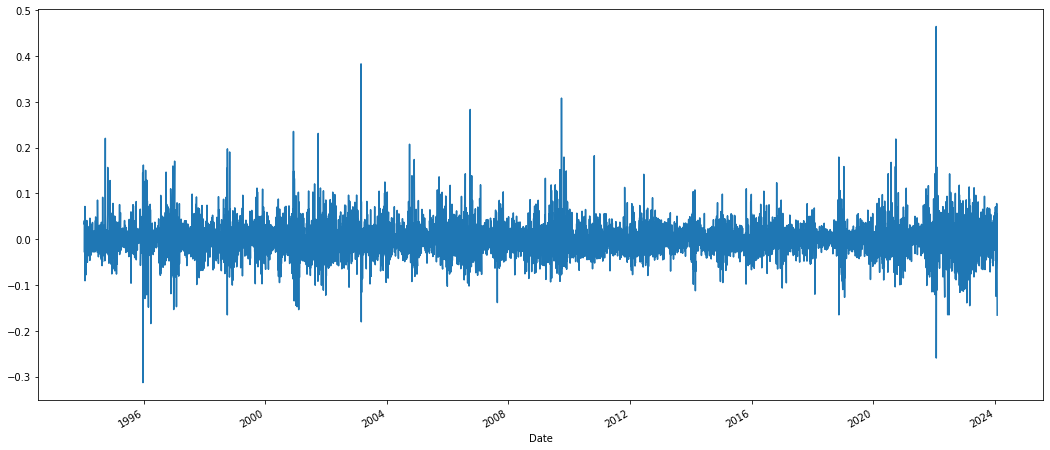

In [11]:
natgas_futures['daily_return'].plot(figsize=(18,8))

#### Aligning data to same window 01-94 to 12-23

In [12]:
natgas_futures

,natgas_future_price,daily_return
Date,,
1994-01-13,2.194,NaN
1994-01-14,2.268,0.033728
1994-01-17,2.360,0.040564
1994-01-18,2.318,-0.017797
1994-01-19,2.252,-0.028473
...,...,...
2024-01-24,2.641,0.077959
2024-01-25,2.571,-0.026505
2024-01-26,2.712,0.054842


In [13]:
natgas_futures_data = natgas_futures[natgas_futures.index < '1-1-2024']
natgas_futures_data

,natgas_future_price,daily_return
Date,,
1994-01-13,2.194,NaN
1994-01-14,2.268,0.033728
1994-01-17,2.360,0.040564
1994-01-18,2.318,-0.017797
1994-01-19,2.252,-0.028473
...,...,...
2023-12-22,2.610,0.014774
2023-12-26,2.550,-0.022989
2023-12-27,2.619,0.027059


In [14]:
cpu

,cpu_index
date,
1987-04-01,43.589069
1987-05-01,41.862022
1987-06-01,71.135203
1987-07-01,53.756704
1987-08-01,60.615545
...,...
2023-08-01,153.417951
2023-09-01,213.599284
2023-10-01,150.606362


In [15]:
cpu_data = cpu[cpu.index > 'Dec-93']
cpu_data

,cpu_index
date,
1994-01-01,56.733087
1994-02-01,70.789021
1994-03-01,55.449487
1994-04-01,89.294281
1994-05-01,71.074022
...,...
2023-08-01,153.417951
2023-09-01,213.599284
2023-10-01,150.606362


In [16]:
data = natgas_futures_data['daily_return']
data = data.ffill()
data = data.dropna()
model = arch_model(data, vol='Garch', p=1, q=1)
results = model.fit()

# Display the GARCH model summary
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.6324948626644517e+19
Iteration:      2,   Func. Count:     17,   Neg. LLF: -14925.670828603548
Optimization terminated successfully    (Exit mode 0)
            Current function value: -14925.670803660207
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           daily_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                14925.7
Distribution:                  Normal   AIC:                          -29843.3
Method:            Maximum Likelihood   BIC:                          -29815.6
                                        No. Observations:                 7525
Date:                Fri, Feb 16 2024   Df Residuals:                     7524
Time:   

/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001374. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# Continuing from Gourav's data extraction. Didn't use the Garch model

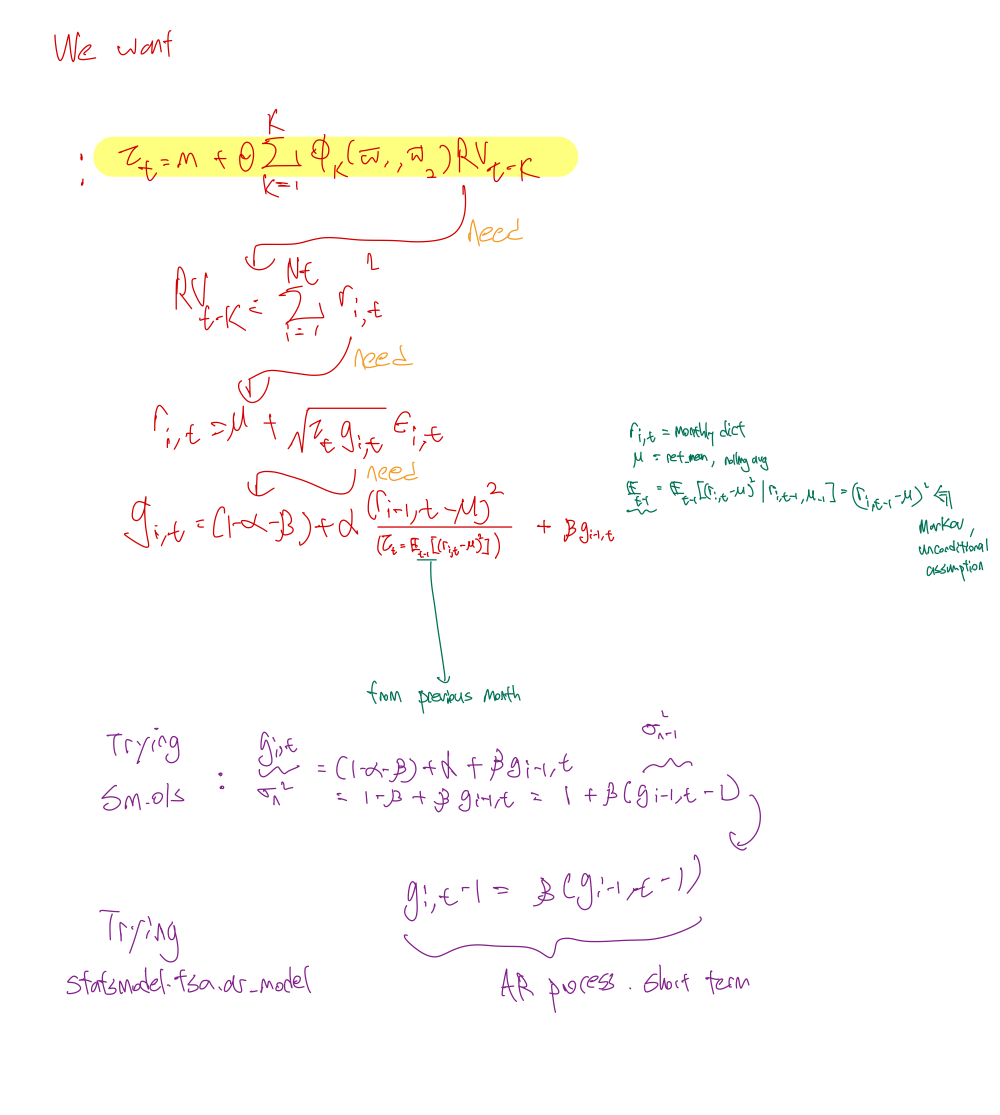

In [17]:
data1 = data.copy()
data_month_mean = data1.resample("M").mean()
data_month_var = (data1.resample("M").std())**2 #tau

#determine g_i_t = 1 + b*(gi_t - 1)
#need to define rolling mean
ret_mean = data1.rolling(window=22).mean().dropna().iloc[2:-1]

g_minus1 = data1.rolling(window=22).std()**2
g_minus1_ = g_minus1.dropna().iloc[2:-1]

g_t = g_minus1.shift(-1).dropna().iloc[3:]**2
data2 = data1.iloc[23:].dropna().iloc[:-1]

#g_t**2 = (1-a-b) + a*(data2-ret_mean)**2 + b*g_minus1_**2

In [22]:
#attempt linear regression with autoregressive gi_t and assumption that markov process is at work.
import statsmodels.api as sm

# Fit the linear regression model
model = sm.OLS(g_t - 1, g_minus1_-1, missing='drop')
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:           daily_return   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.948e+09
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                        0.00
Time:                        14:28:47   Log-Likelihood:                          37669.
No. Observations:                7501   AIC:                                 -7.534e+04
Df Residuals:                    7500   BIC:                                 -7.533e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [56]:
epsilson = result.resid
epsilson

Date
1994-02-16   -0.000197
1994-02-17   -0.000192
1994-02-18   -0.000150
1994-02-22   -0.000284
1994-02-23   -0.000297
                ...   
2023-12-21    0.000485
2023-12-22    0.000471
2023-12-26    0.000479
2023-12-27    0.000436
2023-12-28    0.000432
Length: 7501, dtype: float64

In [ ]:
#coeff is larger than 1 -> not stationary

In [33]:
#attempting AR process instead of linear regression

from statsmodels.tsa.ar_model import AutoReg

res = AutoReg(g_t-1, lags = [1], trend ="c").fit()
print(res.summary())
print(res.aic, res.hqic, res.bic)

#AR coefficient is <1 -> stationary (which agrees with the return's time series graph)

                            AutoReg Model Results                             
Dep. Variable:           daily_return   No. Observations:                 7501
Model:                     AutoReg(1)   Log Likelihood               82037.072
Method:               Conditional MLE   S.D. of innovations              0.000
Date:                Fri, 16 Feb 2024   AIC                        -164068.144
Time:                        14:45:32   BIC                        -164047.376
Sample:                             1   HQIC                       -164061.012
                                 7501                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0259      0.003     -9.920      0.000      -0.031      -0.021
daily_return.L1     0.9741      0.003    373.022      0.000       0.969       0.979
                                

/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
epsilon2 = res.resid
epsilon2

Date
1994-02-17   -1.817432e-07
1994-02-18    3.743397e-07
1994-02-22   -7.207885e-09
1994-02-23   -8.321360e-07
1994-02-24   -9.625487e-07
                  ...     
2023-12-21   -7.121560e-08
2023-12-22   -1.084499e-07
2023-12-26   -1.752290e-08
2023-12-27   -8.559034e-08
2023-12-28   -1.478480e-07
Length: 7500, dtype: float64

In [118]:
#fyi: t represents t-th month

#we need to define tau which is the expectation of next month's (ri_t-data_month_mean)^2 = (ri,t-1 - data_month_mean)^2

#monthly_dict is data split into dictionary based on the month.
monthly_dict = {month: group for month, group in data.groupby(data.index.to_period("M"))}
monthly_dict

#now, we need to perform (ri_t-data_month_mean)^2
r_minus_u_dict = {}
count = 1
df3 = pd.DataFrame()
for key, df in monthly_dict.items():
    
    r_minus_u_dict[key] = (df-data_month_mean.iloc[count-1])**2 
    count+=1
    df2 = pd.DataFrame({"(r-u)^2": r_minus_u_dict[key]})#.values.flatten()
    df3 = pd.concat([df3,df2], axis=0)
    
df3 


tau = df3.iloc[23:-1]
ri_t = ret_mean.iloc[1:] + np.sqrt(np.dot(g_t.values,tau.values))*epsilon2

In [119]:
ri_t

Date
1994-02-17    0.002058
1994-02-18    0.003982
1994-02-22    0.001728
1994-02-23   -0.000650
1994-02-24   -0.003578
                ...   
2023-12-21   -0.004729
2023-12-22   -0.003490
2023-12-26   -0.005350
2023-12-27   -0.003461
2023-12-28   -0.003565
Length: 7500, dtype: float64

In [122]:
#find realised volatility, RV_tminusk 
RV_tminusk = (ri_t**2).cumsum()
RV_tminusk

Date
1994-02-17    0.000004
1994-02-18    0.000020
1994-02-22    0.000023
1994-02-23    0.000023
1994-02-24    0.000036
                ...   
2023-12-21    0.393228
2023-12-22    0.393240
2023-12-26    0.393268
2023-12-27    0.393280
2023-12-28    0.393293
Length: 7500, dtype: float64

In [ ]:
#to find phi which is the pdf with 2 DOF (omega1, omega2)


In [ ]:
#perform regression to "forecast" the long term tau using realised volatility
formula = "tau_k ~ "